In [59]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
import numpy as np
import math
import pandas as pd
import pprint

# data_raw = pd.read_csv('Wine.csv')
# remove_categorical = []
# dataset = data_raw.drop(columns = remove_categorical)
# features = dataset.columns
# data_npy = dataset.to_numpy()

# Read data from sklearn load as same wine dataset is available there.

wine = load_wine()
features = wine.feature_names
data_npy = wine.data
dataset = pd.DataFrame(data_npy)
features = [i.replace("_", " ") for i in features]
dataset.columns = features
std_sklr = StandardScaler()
x = std_sklr.fit_transform(X = data_npy)
pca_data = PCA(n_components=len(features))
norm_principalComponents_data = pca_data.fit_transform(x)

min_max_sklr = MinMaxScaler(feature_range=(-1,1))
norm_principalComponents_data = min_max_sklr.fit_transform(X = norm_principalComponents_data)
eigen_values = pca_data.explained_variance_

def get_data(): 
    scree_plot = {}
    eigen_total = sum(eigen_values)
    variance_percentage = []
    for i in  eigen_values:
        variance_percentage.append((i/eigen_total)*100)
    
    cumulative_variance = []
    temp = 0
    for i in variance_percentage:
        temp += i
        cumulative_variance.append(temp)
 
    for i in range(0, len(eigen_values)):
        scree_plot[i+1] = {"variance_percentage" : variance_percentage[i], "cumulative_variance": cumulative_variance[i]}
    return scree_plot

def get_top_pca():
    feature_contri = {}
    count = 0
    for i, j, k in zip(features, pca_data.components_[0], pca_data.components_[1]):
        feature_contri[count] = {}
        feature_contri[count]["name"] = i
        feature_contri[count]["pc1"] = j
        feature_contri[count]["pc2"] = k
        count += 1
        
    top_pca = norm_principalComponents_data[:,:2]
    plot_pca = {}
    for i in range(0, len(top_pca)):
        plot_pca[i] = {}
        plot_pca[i]['pc1'] = top_pca[i, 0]
        plot_pca[i]['pc2'] = top_pca[i, 1]
        
    return feature_contri, plot_pca

def get_top_four_features(di = 3):
    squared_value = pca_data.components_[:di] ** 2

    features_dict = {}
    for i in range(0, len(squared_value[0])):
        total = 0
        for j in range(0, len(squared_value)):
            total += squared_value[j][i]
        features_dict[features[i]] = total

    sorted_features_dict = [k for k, v in sorted(features_dict.items(), key=lambda item: item[1])]
    sorted_features_dict = sorted_features_dict[::-1]
    best_four_features = sorted_features_dict[:4]
    
    values_best_best_four_features = {}
    for i in best_four_features:
        values_best_best_four_features[i] = features_dict[i]

    return values_best_best_four_features

def get_top_four_matrix(di = 3):
    imp_features = get_top_four_features(di)
    imp_features_arr = [i for i in imp_features]
    np_data = dataset[imp_features_arr].to_numpy()

    cluster_features = [i for i in imp_features]
    featured_data = dataset[cluster_features]
    kmeans = KMeans(n_clusters=3, random_state=0).fit(featured_data)

    send_data = {}
    for i in range(0, np_data.shape[0]):
        send_data[i] = {}
        for j in range(0, len(imp_features_arr)):
            send_data[i][imp_features_arr[j]] = np_data[i][j]
        send_data[i]['label'] = int(kmeans.labels_[i])
    return send_data

def get_mds():
    to_mds = data_npy.copy()
    embeddings = MDS(n_components=2)
    transformed = embeddings.fit_transform(data_npy)
    transformed = min_max_sklr.fit_transform(transformed)
    mds_data = []
    for i in range(transformed.shape[0]):
        mds_data.append({'dim1': transformed[i][0], 'dim2': transformed[i][1]})
    return mds_data

(178, 13)
(178, 178)
[[112.91867056 298.56752227]
 [132.01360821 273.02839878]
 [189.66731961 395.06874498]
 [267.85335807 682.4008973 ]
 [-23.51248028  -2.11598092]
 [257.73268334 654.10618726]
 [234.36105888 490.19390149]
 [213.25814542 505.32915108]
 [131.57223532 267.63273109]
 [129.56668173 268.54816656]]
[[112.91867056 298.56752227]
 [132.01360821 273.02839878]
 [189.66731961 395.06874498]
 [267.85335807 682.4008973 ]
 [-23.51248028  -2.11598092]
 [257.73268334 654.10618726]
 [234.36105888 490.19390149]
 [213.25814542 505.32915108]
 [131.57223532 267.63273109]
 [129.56668173 268.54816656]]


NameError: name 'embeddings' is not defined

In [48]:
kmeans.labels_[0]

0

In [45]:
kmeans.cluster_centers_

array([[3.36981132, 5.00566038, 0.29056604, 1.56037736],
       [2.88659794, 6.30103093, 1.69587629, 4.95876289]])

In [64]:
most_important

[7, 9, 11, 21, 4, 28, 29, 14, 16, 8]

In [75]:
features = breast.feature_names
features.shape

(569,)

In [83]:
for i in features:
    print(i)

mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension


In [96]:
data_send = {}
count = 0
for i, j, k in zip(features, pca_breast.components_[0], pca_breast.components_[1]):
    data_send[count] = {}
    data_send[count]["name"] = i
    data_send[count]["pc1"] = j
    data_send[count]["pc2"] = k
    count += 1

In [97]:
data_send

{0: {'name': 'mean radius',
  'pc1': 0.21890244370001577,
  'pc2': -0.233857131747535},
 1: {'name': 'mean texture',
  'pc1': 0.10372457821567597,
  'pc2': -0.05970608829080295},
 2: {'name': 'mean perimeter',
  'pc1': 0.2275372930056408,
  'pc2': -0.21518136139684982},
 3: {'name': 'mean area',
  'pc1': 0.22099498538594436,
  'pc2': -0.23107671128362745},
 4: {'name': 'mean smoothness',
  'pc1': 0.14258969436025495,
  'pc2': 0.18611302267032268},
 5: {'name': 'mean compactness',
  'pc1': 0.23928535395301204,
  'pc2': 0.15189161007283025},
 6: {'name': 'mean concavity',
  'pc1': 0.25840048124874004,
  'pc2': 0.0601653627989567},
 7: {'name': 'mean concave points',
  'pc1': 0.26085375838568264,
  'pc2': -0.03476750049364384},
 8: {'name': 'mean symmetry',
  'pc1': 0.13816695930365536,
  'pc2': 0.19034877037208467},
 9: {'name': 'mean fractal dimension',
  'pc1': 0.06436334637180302,
  'pc2': 0.3665754713785027},
 10: {'name': 'radius error',
  'pc1': 0.20597877585522775,
  'pc2': -0.105

/Users/aditya/opt/anaconda3/envs/vis/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[[ 0.17620968  0.10345306]
 [ 0.65366682  0.22583309]
 [ 0.08302196  0.340818  ]
 [-0.59067503  0.44370301]
 [ 0.62658923 -0.32180243]
 [ 0.52732275  0.05636995]
 [-0.15133323  0.53495347]
 [-0.19282029 -0.4582317 ]
 [-0.04153988  0.12778637]
 [ 0.26600682  0.24906742]]
0.17620967950451455 : 0.10345305849447403
0.6536668224462788 : 0.2258330857122121
0.08302195898052603 : 0.3408180005959547
-0.5906750283714527 : 0.4437030145096877
0.6265892270697749 : -0.32180242607498344
0.5273227482739303 : 0.05636995423626634
-0.15133322594484833 : 0.534953467902458
-0.19282029405010132 : -0.4582317025798041
-0.041539878889445096 : 0.12778636913413605
0.2660068208800679 : 0.24906742496282927


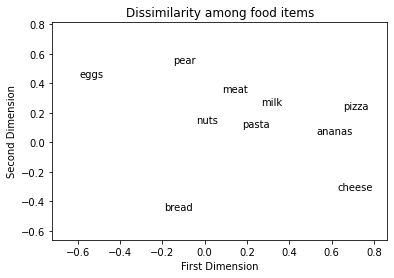

In [55]:
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling
foods_binary = np.random.randint(2, size=(100, 10)) #initial dataset

dis_matrix = pairwise_distances(foods_binary, metric = 'jaccard')

mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(dis_matrix)  
mds_coords = mds_model.fit_transform(dis_matrix) 
print(mds_coords[:10])

food_names = ['pasta', 'pizza', 'meat', 'eggs', 'cheese', 'ananas', 'pear', 'bread', 'nuts', 'milk']
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = food_names
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    print(x,":",y)
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among food items')    
plt.show()